In [128]:
# these packages are used in our analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier

import pylab
import math
from math import log

import folium

import pylab as plot
import numpy as np

from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

import sklearn
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn import datasets
from sklearn import linear_model
from sklearn import ensemble


from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
import geopy.distance as geo
import datetime
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.dummy import DummyRegressor
from IPython import display
from sklearn.metrics import r2_score
from statsmodels.tools.eval_measures import rmse
from IPython.display import Image
%matplotlib inline

from sklearn.tree import DecisionTreeClassifier

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from numpy import where
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, plot_confusion_matrix,\
    precision_score, recall_score, accuracy_score, f1_score, log_loss,\
    roc_curve, roc_auc_score, classification_report
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import plot_roc_curve

In [29]:
df = pd.read_csv('listings.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38277 entries, 0 to 38276
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            38277 non-null  int64  
 1   listing_url                                   38277 non-null  object 
 2   scrape_id                                     38277 non-null  int64  
 3   last_scraped                                  38277 non-null  object 
 4   name                                          38264 non-null  object 
 5   description                                   37085 non-null  object 
 6   neighborhood_overview                         22650 non-null  object 
 7   picture_url                                   38277 non-null  object 
 8   host_id                                       38277 non-null  int64  
 9   host_url                                      38277 non-null 

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (67) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [30]:
df.amenities

0        ["Extra pillows and blankets", "Baking sheet",...
1        ["Extra pillows and blankets", "Luggage dropof...
2        ["Kitchen", "Long term stays allowed", "Wifi",...
3        ["Kitchen", "BBQ grill", "Cable TV", "Carbon m...
4        ["Room-darkening shades", "Lock on bedroom doo...
                               ...                        
38272    ["Fire extinguisher", "Cooking basics", "Carbo...
38273    ["Fire extinguisher", "Cooking basics", "Carbo...
38274    ["Hangers", "Long term stays allowed", "Fire e...
38275    ["Hangers", "Long term stays allowed", "Fire e...
38276    ["Stainless steel electric stove", "Security c...
Name: amenities, Length: 38277, dtype: object

In [31]:
#Finding only important features
df2 = df[['id','host_id','longitude','latitude','property_type','room_type','accommodates','bedrooms','beds','price','number_of_reviews','review_scores_rating', 'review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','calculated_host_listings_count','neighbourhood_group_cleansed','availability_30','minimum_nights','first_review']]

In [32]:
df2

id    host_id  longitude   latitude  \
0          2595       2845 -73.985590  40.753560   
1          3831       4869 -73.957650  40.684940   
2          5121       7356 -73.955120  40.685350   
3          5136       7378 -73.994540  40.662650   
4          5178       8967 -73.983170  40.764570   
...         ...        ...        ...        ...   
38272  53662330  100146245 -74.136715  40.632222   
38273  53662542  100146245 -74.136142  40.630502   
38274  53662772  337879004 -73.980536  40.753887   
38275  53663081  337879004 -73.981976  40.755569   
38276  53665099   60105727 -73.894990  40.677560   

                            property_type        room_type  accommodates  \
0                      Entire rental unit  Entire home/apt             1   
1                      Entire guest suite  Entire home/apt             3   
2             Private room in rental unit     Private room             2   
3                      Entire rental unit  Entire home/apt             4   
4             Private room in rental unit     Private room             2   
...                                   ...              ...           ...   
38272    Private room in residential home     Private room             2   
38273    Private room in residential home     Private room             2   
38274  Private room in serviced apartment     Private room             2   
38275  Private room in serviced apartment     Private room             2   
38276                  Entire rental unit  Entire home/apt            14   

       bedrooms  beds    price  ...  review_scores_cleanliness  \
0           NaN   1.0  $150.00  ...                       4.62   
1           1.0   3.0   $75.00  ...                       4.49   
2           1.0   1.0   $60.00  ...                       4.09   
3           2.0   2.0  $275.00  ...                       5.00   
4           1.0   1.0   $68.00  ...                       3.73   
...         ...   ...      ...  ...                        ...   
38272       1.0   NaN   $79.00  ...                        NaN   
38273       1.0   NaN   $76.00  ...                        NaN   
38274       1.0   1.0  $116.00  ...                        NaN   
38275       1.0   1.0  $106.00  ...                        NaN   
38276       6.0   8.0  $689.00  ...                        NaN   

       review_scores_checkin  review_scores_communication  \
0                       4.76                         4.79   
1                       4.78                         4.80   
2                       4.91                         4.91   
3                       5.00                         5.00   
4                       4.66                         4.42   
...                      ...                          ...   
38272                    NaN                          NaN   
38273                    NaN                          NaN   
38274                    NaN                          NaN   
38275                    NaN                          NaN   
38276                    NaN                          NaN   

       review_scores_location  review_scores_value  \
0                        4.86                 4.41   
1                        4.71                 4.64   
2                        4.47                 4.52   
3                        4.50                 5.00   
4                        4.87                 4.36   
...                       ...                  ...   
38272                     NaN                  NaN   
38273                     NaN                  NaN   
38274                     NaN                  NaN   
38275                     NaN                  NaN   
38276                     NaN                  NaN   

       calculated_host_listings_count  neighbourhood_group_cleansed  \
0                                   3                     Manhattan   
1                                   1                      Brooklyn   
2                                   2                      Brooklyn   
3               

In [33]:
#Number of Missing Values
df2.isna().sum()

id                                    0
host_id                               0
longitude                             0
latitude                              0
property_type                         0
room_type                             0
accommodates                          0
bedrooms                           3975
beds                               2405
price                                 0
number_of_reviews                     0
review_scores_rating               9504
review_scores_accuracy            10116
review_scores_cleanliness         10105
review_scores_checkin             10123
review_scores_communication       10112
review_scores_location            10126
review_scores_value               10127
calculated_host_listings_count        0
neighbourhood_group_cleansed          0
availability_30                       0
minimum_nights                        0
first_review                       9504
dtype: int64

In [34]:
df2['price'] = (df2['price'].str.replace(r'[^-+\d.]', '').astype(float))

<ipython-input-34-fa14d3eccbed>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['price'] = (df2['price'].str.replace(r'[^-+\d.]', '').astype(float))


In [35]:
df2['review_scores_rating'].value_counts()

5.00    8721
4.00    1193
4.50    1106
4.67     903
4.75     728
        ... 
3.30       1
3.55       1
3.81       1
3.58       1
2.89       1
Name: review_scores_rating, Length: 156, dtype: int64

### Map

In [129]:
mapdf = df2[['latitude','longitude','price']]

In [130]:
mapdf

latitude  longitude   price
1      40.684940 -73.957650    75.0
2      40.685350 -73.955120    60.0
3      40.662650 -73.994540   275.0
4      40.764570 -73.983170    68.0
5      40.803800 -73.967510    75.0
...          ...        ...     ...
38021  40.766867 -73.924403    89.0
38153  40.710918 -73.959553  1980.0
38164  40.678150 -73.910910    64.0
38168  40.660757 -73.929937    84.0
38247  40.591505 -73.795033    70.0

[24080 rows x 3 columns]

In [150]:
mapdf.latitude.min()

40.50456

In [151]:
mapdf.latitude.max()

40.9131

In [152]:
mapdf.longitude.min()

-74.24984

In [153]:
mapdf.longitude.max()

-73.71087

In [147]:
map = folium.Map(location=[mapdf.latitude.mean(), mapdf.longitude.mean()], zoom_start=12, control_scale=True)

In [148]:
map

FileNotFoundError: [Errno 2] No such file or directory: 'mapofnyc.png'

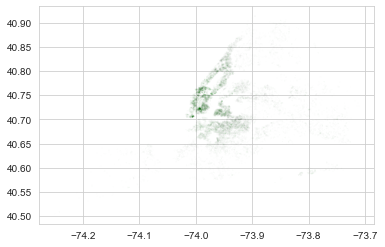

In [155]:
import matplotlib.pyplot as plt
import pandas as pd

import matplotlib.image as mpimg
fig, ax = plt.subplots()

size = df2['price']
s = [s/50000 for s in size]

ax.scatter(df2['longitude'], df2['latitude'], s=s, alpha=0.1, c='green')

seattle_img=mpimg.imread('mapofnyc.png')
# c is the attribute we'll map onto colors, s is the attribute we'll represent with circle size.
plt.imshow(nyc_img, extent=[-74.3000, -73.7000, 40.5000, 41.0000], alpha=0.5)

plt.figure(figsize = (18,24))

### Removing outliers 3 STD away

In [36]:
#Removing Outliers
df3 = df2[((df2['price'] - df2['price'].mean()) / df2['price'].std()).abs() < 3]

In [37]:
df3

id    host_id  longitude   latitude  \
0          2595       2845 -73.985590  40.753560   
1          3831       4869 -73.957650  40.684940   
2          5121       7356 -73.955120  40.685350   
3          5136       7378 -73.994540  40.662650   
4          5178       8967 -73.983170  40.764570   
...         ...        ...        ...        ...   
38272  53662330  100146245 -74.136715  40.632222   
38273  53662542  100146245 -74.136142  40.630502   
38274  53662772  337879004 -73.980536  40.753887   
38275  53663081  337879004 -73.981976  40.755569   
38276  53665099   60105727 -73.894990  40.677560   

                            property_type        room_type  accommodates  \
0                      Entire rental unit  Entire home/apt             1   
1                      Entire guest suite  Entire home/apt             3   
2             Private room in rental unit     Private room             2   
3                      Entire rental unit  Entire home/apt             4   
4             Private room in rental unit     Private room             2   
...                                   ...              ...           ...   
38272    Private room in residential home     Private room             2   
38273    Private room in residential home     Private room             2   
38274  Private room in serviced apartment     Private room             2   
38275  Private room in serviced apartment     Private room             2   
38276                  Entire rental unit  Entire home/apt            14   

       bedrooms  beds  price  ...  review_scores_cleanliness  \
0           NaN   1.0  150.0  ...                       4.62   
1           1.0   3.0   75.0  ...                       4.49   
2           1.0   1.0   60.0  ...                       4.09   
3           2.0   2.0  275.0  ...                       5.00   
4           1.0   1.0   68.0  ...                       3.73   
...         ...   ...    ...  ...                        ...   
38272       1.0   NaN   79.0  ...                        NaN   
38273       1.0   NaN   76.0  ...                        NaN   
38274       1.0   1.0  116.0  ...                        NaN   
38275       1.0   1.0  106.0  ...                        NaN   
38276       6.0   8.0  689.0  ...                        NaN   

       review_scores_checkin  review_scores_communication  \
0                       4.76                         4.79   
1                       4.78                         4.80   
2                       4.91                         4.91   
3                       5.00                         5.00   
4                       4.66                         4.42   
...                      ...                          ...   
38272                    NaN                          NaN   
38273                    NaN                          NaN   
38274                    NaN                          NaN   
38275                    NaN                          NaN   
38276                    NaN                          NaN   

       review_scores_location  review_scores_value  \
0                        4.86                 4.41   
1                        4.71                 4.64   
2                        4.47                 4.52   
3                        4.50                 5.00   
4                        4.87                 4.36   
...                       ...                  ...   
38272                     NaN                  NaN   
38273                     NaN                  NaN   
38274                     NaN                  NaN   
38275                     NaN                  NaN   
38276                     NaN                  NaN   

       calculated_host_listings_count  neighbourhood_group_cleansed  \
0                                   3                     Manhattan   
1                                   1                      Brooklyn   
2                                   2                      Brooklyn   
3                                   1   

<AxesSubplot:xlabel='review_scores_rating', ylabel='price'>

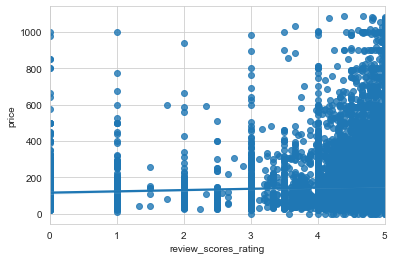

In [38]:
sns.regplot(x=df3['review_scores_rating'], y=df3["price"])

In [39]:
df3.price.value_counts()

150.0    1307
100.0    1162
50.0      906
60.0      895
75.0      823
         ... 
677.0       1
748.0       1
888.0       1
566.0       1
817.0       1
Name: price, Length: 789, dtype: int64

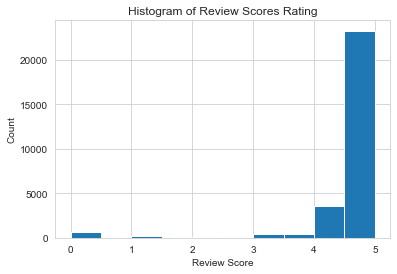

In [40]:
# visualize distribution of review scores ratings
plt.hist(df3['review_scores_rating'][~df3['review_scores_rating'].isnull()])
plt.title("Histogram of Review Scores Rating")
plt.xlabel("Review Score")
plt.ylabel("Count")
plt.show()

In [41]:
df3.review_scores_rating.mean()

4.584886597938144

In [42]:
df3.loc[df3["review_scores_rating"] >= 5, 'overall_rating'] = 'Best'
df3.loc[df3["review_scores_rating"] <= 4, 'overall_rating'] = 'below Threshold'
df3.loc[(df3["review_scores_rating"] > 4.8) & (df3["review_scores_rating"] < 5), 'overall_rating'] = 'very good'
df3.loc[(df3["review_scores_rating"] > 4.6) & (df3["review_scores_rating"] < 4.8), 'overall_rating'] = 'good'
df3.loc[(df3["review_scores_rating"] > 4.4) & (df3["review_scores_rating"] < 4.6), 'overall_rating'] = 'average'
df3.loc[(df3["review_scores_rating"] > 4) & (df3["review_scores_rating"] < 4.4), 'overall_rating'] = 'threshold'

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

In [43]:
df3 = df3.dropna()

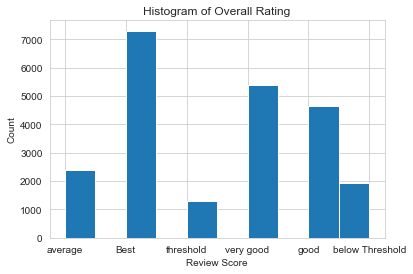

In [44]:
# visualize distribution of overall rating
plt.hist(df3['overall_rating'][~df3['overall_rating'].isnull()])
plt.title("Histogram of Overall Rating")
plt.xlabel("Review Score")
plt.ylabel("Count")
plt.show()

In [45]:
df3

id    host_id  longitude   latitude                property_type  \
1          3831       4869 -73.957650  40.684940           Entire guest suite   
2          5121       7356 -73.955120  40.685350  Private room in rental unit   
3          5136       7378 -73.994540  40.662650           Entire rental unit   
4          5178       8967 -73.983170  40.764570  Private room in rental unit   
5          5203       7490 -73.967510  40.803800  Private room in rental unit   
...         ...        ...        ...        ...                          ...   
38020  53572271  164453630 -73.919143  40.866011  Private room in rental unit   
38021  53572597  433203831 -73.924403  40.766867     Private room in bungalow   
38164  53612732  420843290 -73.910910  40.678150  Private room in rental unit   
38168  53614162    2368191 -73.929937  40.660757           Entire rental unit   
38247  53648074  433511308 -73.795033  40.591505  Private room in rental unit   

             room_type  accommodates  bedrooms  beds  price  ...  \
1      Entire home/apt             3       1.0   3.0   75.0  ...   
2         Private room             2       1.0   1.0   60.0  ...   
3      Entire home/apt             4       2.0   2.0  275.0  ...   
4         Private room             2       1.0   1.0   68.0  ...   
5         Private room             1       1.0   1.0   75.0  ...   
...                ...           ...       ...   ...    ...  ...   
38020     Private room             2       1.0   1.0   71.0  ...   
38021     Private room             2       1.0   1.0   89.0  ...   
38164     Private room             2       1.0   1.0   64.0  ...   
38168  Entire home/apt             3       1.0   2.0   84.0  ...   
38247     Private room             1       1.0   1.0   70.0  ...   

       review_scores_checkin  review_scores_communication  \
1                       4.78                         4.80   
2                       4.91                         4.91   
3                       5.00                         5.00   
4                       4.66                         4.42   
5                       4.97                         4.95   
...                      ...                          ...   
38020                   5.00                         5.00   
38021                   5.00                         5.00   
38164                   1.00                         5.00   
38168                   5.00                         5.00   
38247                   5.00                         5.00   

       review_scores_location  review_scores_value  \
1                        4.71                 4.64   
2                        4.47                 4.52   
3                        4.50                 5.00   
4                        4.87                 4.36   
5                        4.94                 4.92   
...                       ...                  ...   
38020                    5.00                 5.00   
38021                    3.00                 1.00   
38164                    5.00                 2.00   
38168                    5.00                 5.00   
38247                    5.00                 5.00   

       calculated_host_listings_count  neighbourhood_group_cleansed  \
1                                   1                      Brooklyn   
2                                   2                      Brooklyn   
3                                   1                      Brooklyn   
4                                   1                     Manhattan   
5                                   1                     Manhattan   
...                               ...                           ...   
38020                               1                     Manhattan   
38021                               8                        Queens   
38164                               7                      Brooklyn   
38168                               3                      Brooklyn   
38247                               1                       

In [46]:
df2 = df2.dropna()

In [47]:
df2

id    host_id  longitude   latitude                property_type  \
1          3831       4869 -73.957650  40.684940           Entire guest suite   
2          5121       7356 -73.955120  40.685350  Private room in rental unit   
3          5136       7378 -73.994540  40.662650           Entire rental unit   
4          5178       8967 -73.983170  40.764570  Private room in rental unit   
5          5203       7490 -73.967510  40.803800  Private room in rental unit   
...         ...        ...        ...        ...                          ...   
38021  53572597  433203831 -73.924403  40.766867     Private room in bungalow   
38153  53609786   49136387 -73.959553  40.710918           Entire rental unit   
38164  53612732  420843290 -73.910910  40.678150  Private room in rental unit   
38168  53614162    2368191 -73.929937  40.660757           Entire rental unit   
38247  53648074  433511308 -73.795033  40.591505  Private room in rental unit   

             room_type  accommodates  bedrooms  beds   price  ...  \
1      Entire home/apt             3       1.0   3.0    75.0  ...   
2         Private room             2       1.0   1.0    60.0  ...   
3      Entire home/apt             4       2.0   2.0   275.0  ...   
4         Private room             2       1.0   1.0    68.0  ...   
5         Private room             1       1.0   1.0    75.0  ...   
...                ...           ...       ...   ...     ...  ...   
38021     Private room             2       1.0   1.0    89.0  ...   
38153  Entire home/apt             6       2.0   2.0  1980.0  ...   
38164     Private room             2       1.0   1.0    64.0  ...   
38168  Entire home/apt             3       1.0   2.0    84.0  ...   
38247     Private room             1       1.0   1.0    70.0  ...   

       review_scores_cleanliness  review_scores_checkin  \
1                           4.49                   4.78   
2                           4.09                   4.91   
3                           5.00                   5.00   
4                           3.73                   4.66   
5                           4.82                   4.97   
...                          ...                    ...   
38021                       5.00                   5.00   
38153                       5.00                   5.00   
38164                       1.00                   1.00   
38168                       5.00                   5.00   
38247                       5.00                   5.00   

       review_scores_communication  review_scores_location  \
1                             4.80                    4.71   
2                             4.91                    4.47   
3                             5.00                    4.50   
4                             4.42                    4.87   
5                             4.95                    4.94   
...                            ...                     ...   
38021                         5.00                    3.00   
38153                         5.00                    5.00   
38164                         5.00                    5.00   
38168                         5.00                    5.00   
38247                         5.00                    5.00   

       review_scores_value  calculated_host_listings_count  \
1                     4.64                               1   
2                     4.52                               2   
3                     5.00                               1   
4                     4.36                               1   
5                     4.92                               1   
...                    ...                             ...   
38021                 1.00                               8   
38153                 5.00                               1   
38164                 2.00                               7   
38168                 5.00                               3   
38247                 5.00                               1   

       neigh

In [48]:
df.neighbourhood_cleansed.value_counts()

Bedford-Stuyvesant    2821
Williamsburg          2603
Harlem                1971
Hell's Kitchen        1702
Bushwick              1693
                      ... 
Neponsit                 1
Woodrow                  1
Country Club             1
Castle Hill              1
Graniteville             1
Name: neighbourhood_cleansed, Length: 222, dtype: int64

In [49]:
df.describe()

id     scrape_id       host_id  host_listings_count  \
count  3.827700e+04  3.827700e+04  3.827700e+04         38243.000000   
mean   2.962239e+07  2.021120e+13  1.148305e+08            49.020056   
std    1.742239e+07  0.000000e+00  1.299194e+08           312.947661   
min    2.595000e+03  2.021120e+13  2.438000e+03             0.000000   
25%    1.341048e+07  2.021120e+13  1.139462e+07             1.000000   
50%    3.081269e+07  2.021120e+13  5.005297e+07             1.000000   
75%    4.642855e+07  2.021120e+13  2.002395e+08             3.000000   
max    5.366510e+07  2.021120e+13  4.344080e+08          3750.000000   

       host_total_listings_count      latitude     longitude  accommodates  \
count               38243.000000  38277.000000  38277.000000  38277.000000   
mean                   49.020056     40.729206    -73.948967      2.792094   
std                   312.947661      0.055752      0.050759      1.869736   
min                     0.000000     40.504560    -74.249840      0.000000   
25%                     1.000000     40.689260    -73.983270      2.000000   
50%                     1.000000     40.725180    -73.954770      2.000000   
75%                     3.000000     40.762680    -73.930430      4.000000   
max                  3750.000000     40.914020    -73.710870     16.000000   

       bathrooms      bedrooms  ...  review_scores_cleanliness  \
count        0.0  34302.000000  ...               28172.000000   
mean         NaN      1.323567  ...                   4.612408   
std          NaN      0.708327  ...                   0.575452   
min          NaN      1.000000  ...                   0.000000   
25%          NaN      1.000000  ...                   4.500000   
50%          NaN      1.000000  ...                   4.800000   
75%          NaN      1.000000  ...                   5.000000   
max          NaN     16.000000  ...                   5.000000   

       review_scores_checkin  review_scores_communication  \
count           28154.000000                 28165.000000   
mean                4.813884                     4.807454   
std                 0.439260                     0.465544   
min                 0.000000                     0.000000   
25%                 4.800000                     4.810000   
50%                 4.960000                     4.970000   
75%                 5.000000                     5.000000   
max                 5.000000                     5.000000   

       review_scores_location  review_scores_value  \
count            28151.000000         28150.000000   
mean                 4.750307             4.646892   
std                  0.416101             0.518905   
min                  0.000000             0.000000   
25%                  4.670000             4.550000   
50%                  4.880000             4.780000   
75%                  5.000000             5.000000   
max                  5.000000             5.000000   

       calculated_host_listings_count  \
count                    38277.000000   
mean                        17.747655   
std                         59.150451   
min                          1.000000   
25%                          1.000000   
50%                          1.000000   
75%                          3.000000   
max                        421.000000   

       calculated_host_listings_count_entire_homes  \
count                                 38277.000000   
mean                                      8.042637   
std                                      34.977178   
min                                       0.000000   
25%                                       0.000000   
50%                                       1.000000   
75%                                       1.000000   
max                                     308.000000   

       calculated_host_listings_count_private_rooms  \
count                                  38277.000000   
mean                                       9.593934   
std        

### Neighborhood

In [50]:
df.neighbourhood_group_cleansed.value_counts()

Manhattan        16781
Brooklyn         14716
Queens            5323
Bronx             1104
Staten Island      353
Name: neighbourhood_group_cleansed, dtype: int64

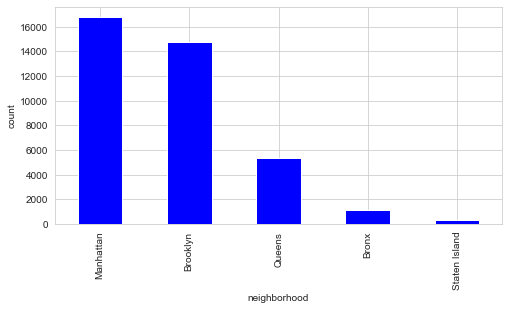

In [51]:
plt.figure(figsize=(8, 4))
df.neighbourhood_group_cleansed.value_counts().plot(kind='bar', color='b')
plt.xticks(rotation=90)
plt.ylabel('count')
plt.xlabel('neighborhood')
plt.show()

In [52]:
df.neighbourhood_cleansed.value_counts()

Bedford-Stuyvesant    2821
Williamsburg          2603
Harlem                1971
Hell's Kitchen        1702
Bushwick              1693
                      ... 
Neponsit                 1
Woodrow                  1
Country Club             1
Castle Hill              1
Graniteville             1
Name: neighbourhood_cleansed, Length: 222, dtype: int64

In [116]:
import wordcloud
from wordcloud import WordCloud, STOPWORDS

In [117]:
stopwords = set(STOPWORDS)
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=500,
        max_font_size=30, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))
    
    fig = plt.figure(1, figsize=(8, 8))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

In [119]:
summaryDF = df[['description','price']]
summaryDF = summaryDF[pd.notnull(summaryDF['description'])]
summaryDF = summaryDF[summaryDF['description']!=0]

summaryDF = summaryDF.sort_values('price',ascending=[0])
top100DF = summaryDF.head(100)
top100DF.head()

description    price
35688  No worries about drinking and driving, you can...  $999.00
5172   Celebrity owned and designed, loft-style HOME ...  $999.00
28558  You can party like its 1999. Large private spa...  $999.00
20477  Marriott Vacation Club Pulse NYC<br />In the h...  $999.00
16718  Experience unparalleled luxury at our iconic f...  $999.00

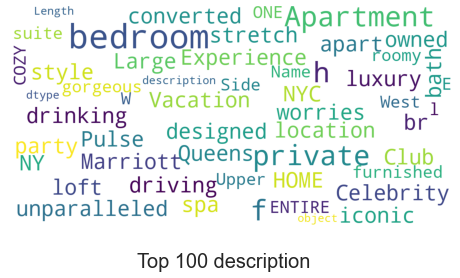

In [121]:
show_wordcloud(top100DF["description"] , title = "Top 100 description")


/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


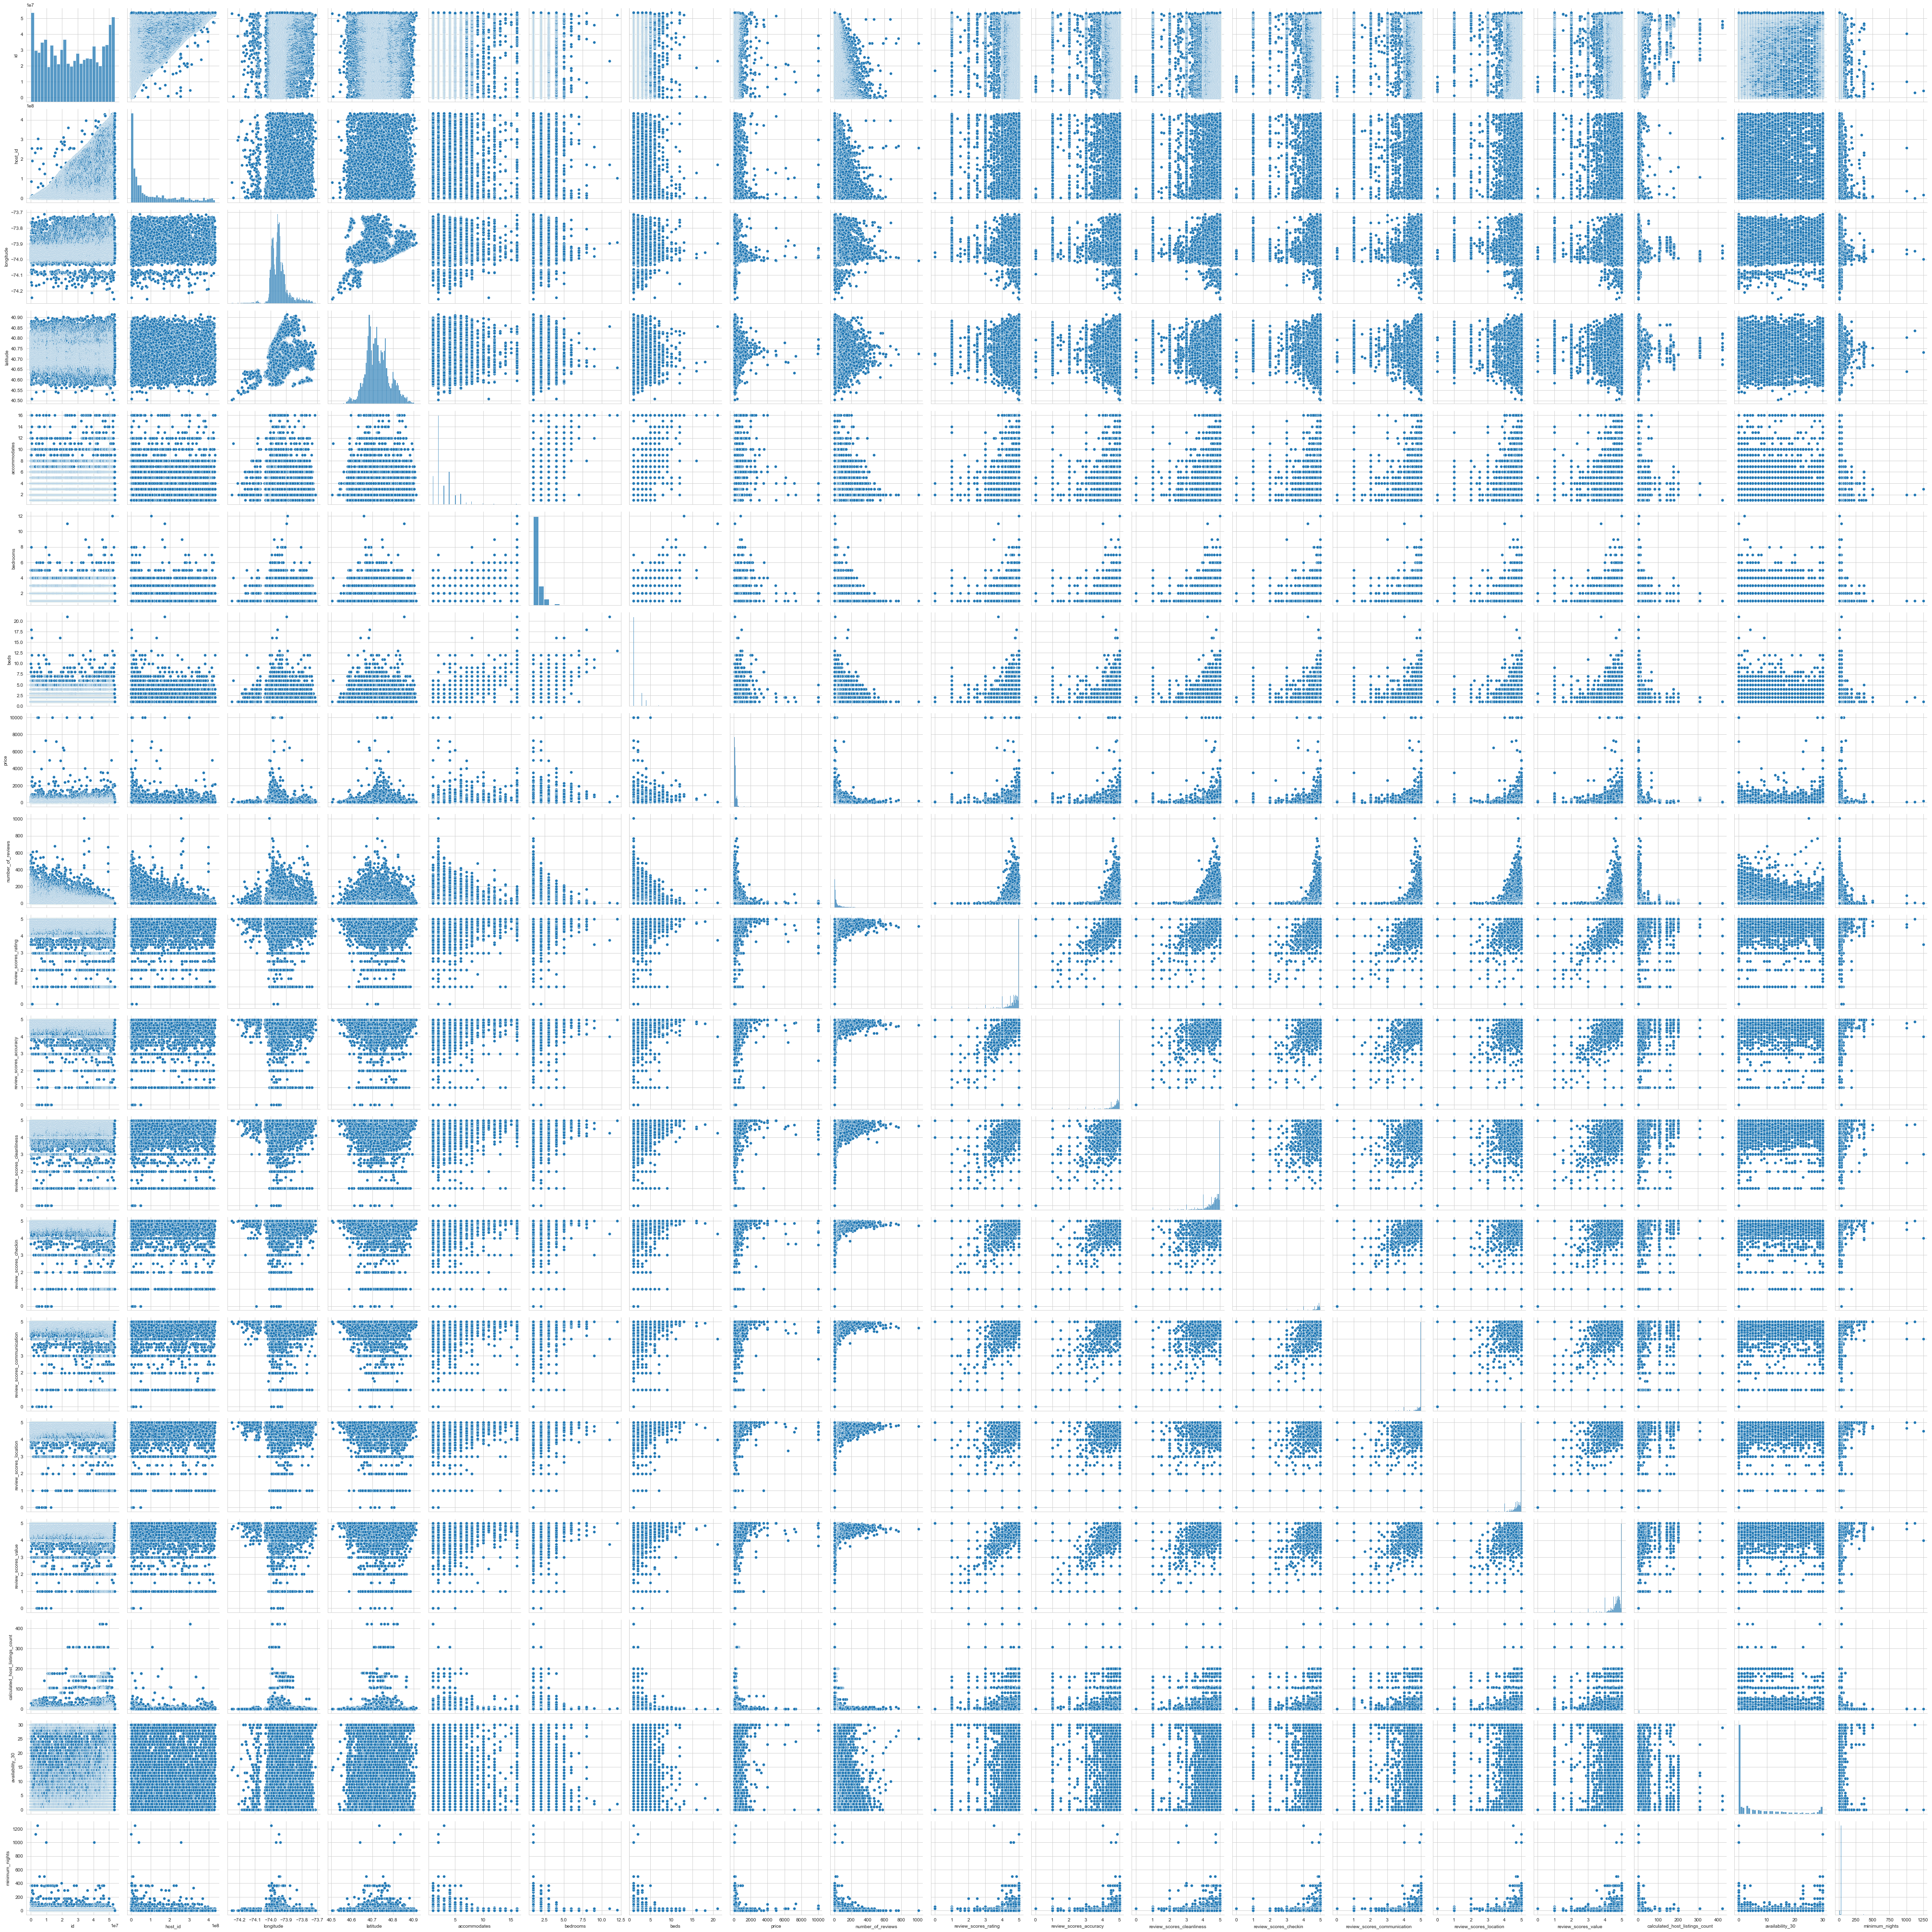

In [53]:
#Plot pairwise relationships in the dataset
sns.set_style("whitegrid");
sns.pairplot(df2, palette='rainbow', size=3);
plt.show()

In [55]:
review_count_dates = pd.to_datetime(df2['first_review']).value_counts().resample('D').mean().fillna(0)

Text(0, 0.5, 'first_review')

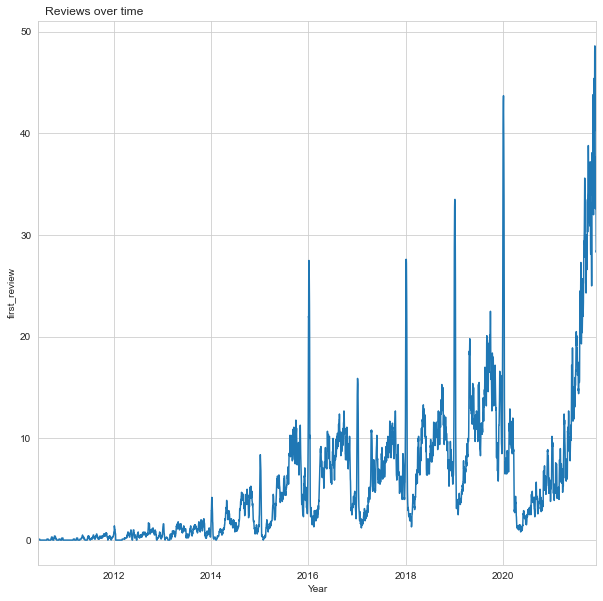

In [56]:
fig = plt.figure(1, figsize=(10,10))
ax = fig.add_subplot(111)
ax.grid(True)
review_count_dates.rolling(window=10).mean().plot(ax=ax, title = 'Reviews over time')

ax.set_title(ax.get_title())
ax.title.set_position((0.1,1.04))

xlab = 'Year'
ax.set_xlabel(xlab)

ylab = 'first_review'
ax.set_ylabel(ylab)

In [57]:
Accomodations = df2.pivot_table(index='property_type', columns= 'room_type', values='accommodates' ,aggfunc=np.sum,fill_value=0)

In [58]:
Accomodations

room_type                          Entire home/apt  Hotel room  Private room  \
property_type                                                                  
Barn                                             5           0             0   
Boat                                            25           0             0   
Camper/RV                                       21           0             0   
Casa particular                                  4           0             0   
Cave                                             4           0             0   
...                                            ...         ...           ...   
Shared room in rental unit                       0           0             0   
Shared room in residential home                  0           0             0   
Shared room in serviced apartment                0           0             0   
Shared room in townhouse                         0           0             0   
Tiny house                                      35           0             0   

room_type                          Shared room  
property_type                                   
Barn                                         0  
Boat                                         0  
Camper/RV                                    0  
Casa particular                              0  
Cave                                         0  
...                                        ...  
Shared room in rental unit                 436  
Shared room in residential home             91  
Shared room in serviced apartment            2  
Shared room in townhouse                    10  
Tiny house                                   0  

[63 rows x 4 columns]

(0.0, 4000.0)

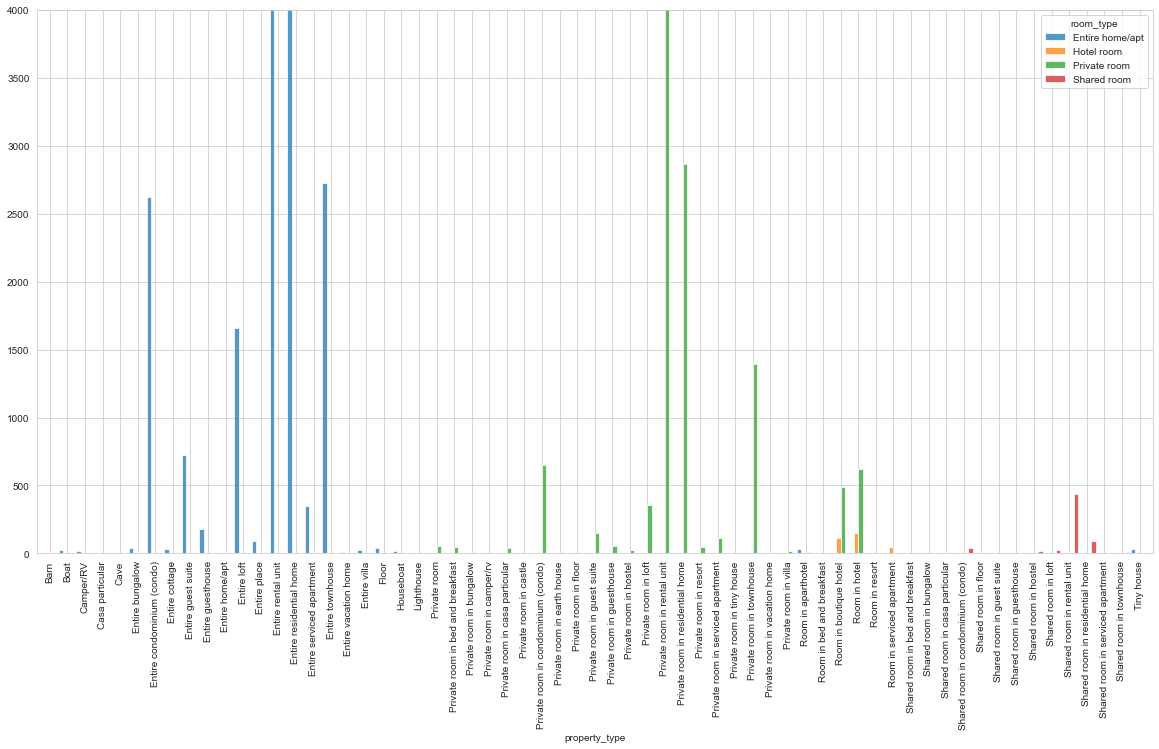

In [59]:
#plot.axis([0, 10, 0, 20])
Accomodations.plot.bar(figsize=(20,10),width=1, alpha=.75).axes.set_ylim([0,4000])

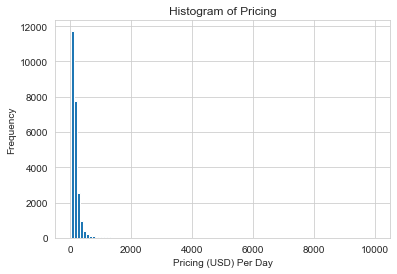

In [60]:
# visualize distribution of price (target variable)
plt.hist(df2['price'], bins=100)
plt.title("Histogram of Pricing")
plt.xlabel("Pricing (USD) Per Day")
plt.ylabel("Frequency")
plt.show()

In [61]:
print('Most expensive accomodations :', np.max(df2['price']))#To get the maximum price
print('The major chunk revollves around the price :',np.percentile(df2['price'],97))#The overexpensive accomodations are only in top 3%

Most expensive accomodations : 10000.0
The major chunk revollves around the price : 504.0


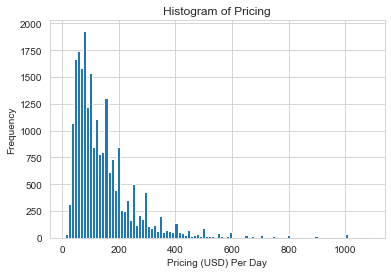

In [62]:
# visualize distribution of price (target variable)
plt.hist(df3['price'], bins=100)
plt.title("Histogram of Pricing")
plt.xlabel("Pricing (USD) Per Day")
plt.ylabel("Frequency")
plt.show()

In [63]:
df3.price.mean()

149.12020382387527

In [64]:
df3.price.median()

110.0

In [65]:
df3.loc[df3["price"] >= 110, 'price_range'] = '1'
df3.loc[df3["price"] < 110, 'price_range'] = '0'

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

In [66]:
df3.room_type.value_counts()

Entire home/apt    12108
Private room       10414
Shared room          323
Hotel room           116
Name: room_type, dtype: int64

### One Hot Encoding

In [67]:
ohe_df = pd.get_dummies(df3, columns = ['room_type','neighbourhood_group_cleansed'])
ohe_df.head()

id  host_id  longitude  latitude                property_type  \
1  3831     4869  -73.95765  40.68494           Entire guest suite   
2  5121     7356  -73.95512  40.68535  Private room in rental unit   
3  5136     7378  -73.99454  40.66265           Entire rental unit   
4  5178     8967  -73.98317  40.76457  Private room in rental unit   
5  5203     7490  -73.96751  40.80380  Private room in rental unit   

   accommodates  bedrooms  beds  price  number_of_reviews  ...  price_range  \
1             3       1.0   3.0   75.0                409  ...            0   
2             2       1.0   1.0   60.0                 50  ...            0   
3             4       2.0   2.0  275.0                  2  ...            1   
4             2       1.0   1.0   68.0                507  ...            0   
5             1       1.0   1.0   75.0                118  ...            0   

   room_type_Entire home/apt  room_type_Hotel room  room_type_Private room  \
1                          1                     0                       0   
2                          0                     0                       1   
3                          1                     0                       0   
4                          0                     0                       1   
5                          0                     0                       1   

   room_type_Shared room  neighbourhood_group_cleansed_Bronx  \
1                      0                                   0   
2                      0                                   0   
3                      0                                   0   
4                      0                                   0   
5                      0                                   0   

   neighbourhood_group_cleansed_Brooklyn  \
1                                      1   
2                                      1   
3                                      1   
4                                      0   
5                                      0   

   neighbourhood_group_cleansed_Manhattan  \
1                                       0   
2                                       0   
3                                       0   
4                                       1   
5                                       1   

   neighbourhood_group_cleansed_Queens  \
1                                    0   
2                                    0   
3                                    0   
4                                    0   
5                                    0   

   neighbourhood_group_cleansed_Staten Island  
1                                           0  
2                                           0  
3                                           0  
4                                           0  
5                                           0  

[5 rows x 32 columns]

In [68]:
df4 = ohe_df.drop(labels=['id', 'host_id', 'longitude', 'latitude', 'property_type',
       'accommodates','price','calculated_host_listings_count','first_review',
       'overall_rating'], axis=1)

In [69]:
ohe_df

id    host_id  longitude   latitude                property_type  \
1          3831       4869 -73.957650  40.684940           Entire guest suite   
2          5121       7356 -73.955120  40.685350  Private room in rental unit   
3          5136       7378 -73.994540  40.662650           Entire rental unit   
4          5178       8967 -73.983170  40.764570  Private room in rental unit   
5          5203       7490 -73.967510  40.803800  Private room in rental unit   
...         ...        ...        ...        ...                          ...   
38020  53572271  164453630 -73.919143  40.866011  Private room in rental unit   
38021  53572597  433203831 -73.924403  40.766867     Private room in bungalow   
38164  53612732  420843290 -73.910910  40.678150  Private room in rental unit   
38168  53614162    2368191 -73.929937  40.660757           Entire rental unit   
38247  53648074  433511308 -73.795033  40.591505  Private room in rental unit   

       accommodates  bedrooms  beds  price  number_of_reviews  ...  \
1                 3       1.0   3.0   75.0                409  ...   
2                 2       1.0   1.0   60.0                 50  ...   
3                 4       2.0   2.0  275.0                  2  ...   
4                 2       1.0   1.0   68.0                507  ...   
5                 1       1.0   1.0   75.0                118  ...   
...             ...       ...   ...    ...                ...  ...   
38020             2       1.0   1.0   71.0                  1  ...   
38021             2       1.0   1.0   89.0                  1  ...   
38164             2       1.0   1.0   64.0                  1  ...   
38168             3       1.0   2.0   84.0                  1  ...   
38247             1       1.0   1.0   70.0                  1  ...   

       price_range  room_type_Entire home/apt  room_type_Hotel room  \
1                0                          1                     0   
2                0                          0                     0   
3                1                          1                     0   
4                0                          0                     0   
5                0                          0                     0   
...            ...                        ...                   ...   
38020            0                          0                     0   
38021            0                          0                     0   
38164            0                          0                     0   
38168            0                          1                     0   
38247            0                          0                     0   

       room_type_Private room  room_type_Shared room  \
1                           0                      0   
2                           1                      0   
3                           0                      0   
4                           1                      0   
5                           1                      0   
...                       ...                    ...   
38020                       1                      0   
38021                       1                      0   
38164                       1                      0   
38168                       0                      0   
38247                       1                      0   

       neighbourhood_group_cleansed_Bronx  \
1                                       0   
2                                       0   
3                                       0   
4                                       0   
5                                       0   
...                                   ...   
38020                                   0   
38021                                   0   
38164                                   0   
38168                                   0   
38247                                   0   

       neighbourhood_group_cleansed_Brooklyn  \
1                                          1   
2                                   

In [70]:
df4

bedrooms  beds  number_of_reviews  review_scores_rating  \
1           1.0   3.0                409                  4.45   
2           1.0   1.0                 50                  4.52   
3           2.0   2.0                  2                  5.00   
4           1.0   1.0                507                  4.21   
5           1.0   1.0                118                  4.91   
...         ...   ...                ...                   ...   
38020       1.0   1.0                  1                  5.00   
38021       1.0   1.0                  1                  5.00   
38164       1.0   1.0                  1                  1.00   
38168       1.0   2.0                  1                  5.00   
38247       1.0   1.0                  1                  5.00   

       review_scores_accuracy  review_scores_cleanliness  \
1                        4.58                       4.49   
2                        4.22                       4.09   
3                        5.00                       5.00   
4                        4.21                       3.73   
5                        4.83                       4.82   
...                       ...                        ...   
38020                    5.00                       5.00   
38021                    5.00                       5.00   
38164                    1.00                       1.00   
38168                    5.00                       5.00   
38247                    5.00                       5.00   

       review_scores_checkin  review_scores_communication  \
1                       4.78                         4.80   
2                       4.91                         4.91   
3                       5.00                         5.00   
4                       4.66                         4.42   
5                       4.97                         4.95   
...                      ...                          ...   
38020                   5.00                         5.00   
38021                   5.00                         5.00   
38164                   1.00                         5.00   
38168                   5.00                         5.00   
38247                   5.00                         5.00   

       review_scores_location  review_scores_value  ...  price_range  \
1                        4.71                 4.64  ...            0   
2                        4.47                 4.52  ...            0   
3                        4.50                 5.00  ...            1   
4                        4.87                 4.36  ...            0   
5                        4.94                 4.92  ...            0   
...                       ...                  ...  ...          ...   
38020                    5.00                 5.00  ...            0   
38021                    3.00                 1.00  ...            0   
38164                    5.00                 2.00  ...            0   
38168                    5.00                 5.00  ...            0   
38247                    5.00                 5.00  ...            0   

       room_type_Entire home/apt room_type_Hotel room  room_type_Private room  \
1                              1                    0                       0   
2                              0                    0                       1   
3                              1                    0                       0   
4                              0                    0                       1   
5                              0                    0                       1   
...                          ...                  ...                     ...   
38020                          0                    0                       1   
38021                          0                    0                       1   
38164                          0                    0                       1   
38168                          1                    0                       0   
3824

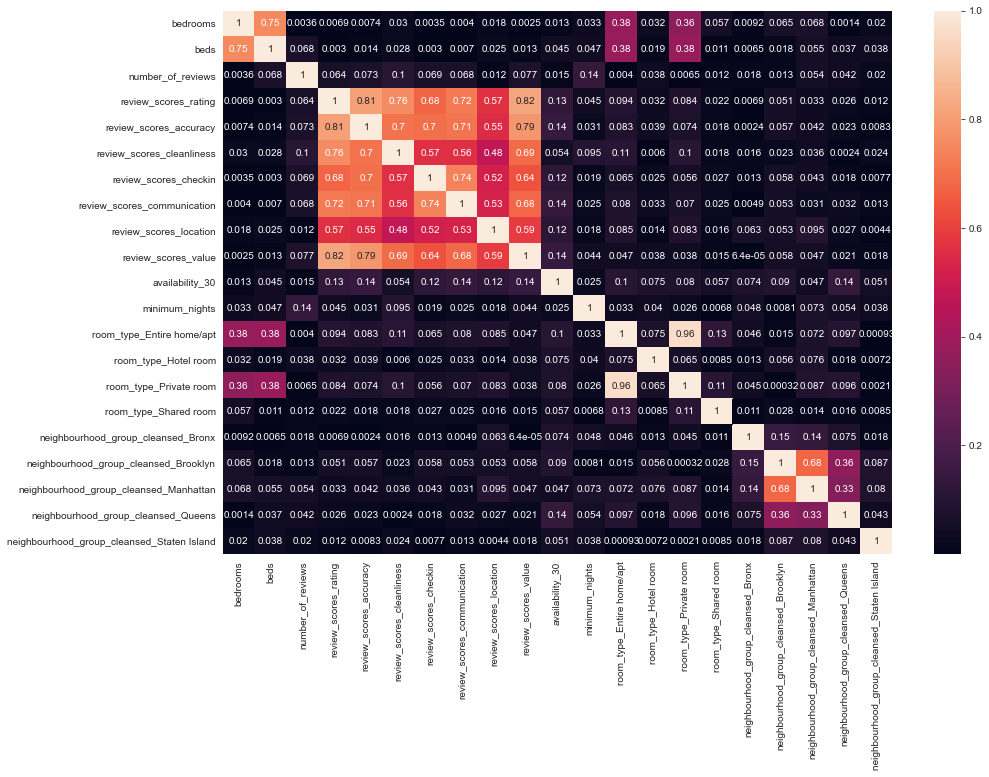

In [113]:
plt.figure(figsize = (15, 10))
sns.heatmap(df4.corr().abs(), annot = True);

### Train Test Split

In [71]:
X = df4.drop("price_range", axis=1)
y = df4["price_range"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2021)

Let's start with a completely "dummy" model, that will always choose the majority class. We will use the train and test split of only numeric variables for the purposes of the dummy model.

In [72]:
dummy_model = DummyClassifier(strategy="most_frequent")

In [73]:
dummy_model.fit(X_train, y_train)

DummyClassifier(strategy='most_frequent')

In [74]:
y_pred = dummy_model.predict(X_train)
y_pred

array(['1', '1', '1', ..., '1', '1', '1'], dtype='<U1')

In [75]:
cv_results = cross_val_score(dummy_model, X_train, y_train, cv=5)
cv_results

array([0.50929152, 0.50929152, 0.50929152, 0.50929152, 0.50958188])

In [76]:
precision_score(y_train, y_pred, pos_label='1')

0.509349593495935

In [77]:
#sourced from the classification_workflow repo
class ModelWithCV():
    '''Structure to save the model and more easily see its crossvalidation'''
    
    def __init__(self, model, model_name, X, y, cv_now=True):
        self.model = model
        self.name = model_name
        self.X = X
        self.y = y
        # For CV results
        self.cv_results = None
        self.cv_mean = None
        self.cv_median = None
        self.cv_std = None
        #
        if cv_now:
            self.cross_validate()
        
    def cross_validate(self, X=None, y=None, kfolds=10):
        '''
        Perform cross-validation and return results.
        
        Args: 
          X:
            Optional; Training data to perform CV on. Otherwise use X from object
          y:
            Optional; Training data to perform CV on. Otherwise use y from object
          kfolds:
            Optional; Number of folds for CV (default is 10)  
        '''
        
        cv_X = X if X else self.X
        cv_y = y if y else self.y

        self.cv_results = cross_val_score(self.model, cv_X, cv_y, cv=kfolds)
        self.cv_mean = np.mean(self.cv_results)
        self.cv_median = np.median(self.cv_results)
        self.cv_std = np.std(self.cv_results)

        
    def print_cv_summary(self):
        cv_summary = (
        f'''CV Results for `{self.name}` model:
            {self.cv_mean:.5f} ± {self.cv_std:.5f} accuracy
        ''')
        print(cv_summary)

        
    def plot_cv(self, ax):
        '''
        Plot the cross-validation values using the array of results and given 
        Axis for plotting.
        '''
        ax.set_title(f'CV Results for `{self.name}` Model')
        # Thinner violinplot with higher bw
        sns.violinplot(y=self.cv_results, ax=ax, bw=.4)
        sns.swarmplot(
                y=self.cv_results,
                color='orange',
                size=10,
                alpha= 0.8,
                ax=ax
        )

        return ax

In [78]:
dummy_model_results = ModelWithCV(
                        model=dummy_model,
                        model_name='dummy',
                        X=X_train, 
                        y=y_train)

CV Results for `dummy` model:
            0.50935 ± 0.00017 accuracy
        


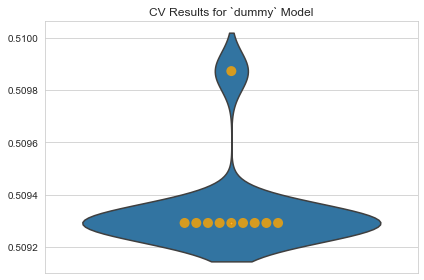

In [79]:
fig, ax = plt.subplots()

ax = dummy_model_results.plot_cv(ax)
plt.tight_layout();

dummy_model_results.print_cv_summary()

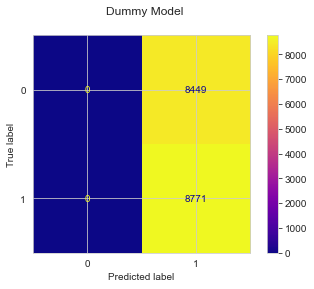

In [80]:
fig, ax = plt.subplots()

fig.suptitle("Dummy Model")

plot_confusion_matrix(dummy_model, X_train, y_train, ax=ax, cmap="plasma");

In [81]:
confusion_matrix(y_train, dummy_model.predict(X_train))

array([[   0, 8449],
       [   0, 8771]])

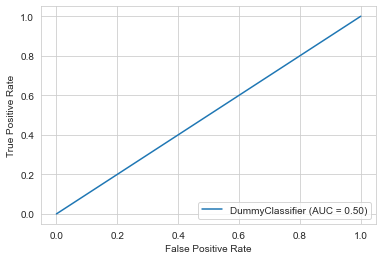

In [82]:
plot_roc_curve(dummy_model, X_train, y_train);

### Logistic Regression

In [83]:
simple_logreg_model = LogisticRegression(random_state=2021, penalty='none')

In [84]:
simple_logreg_model.fit(X_train, y_train)

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(penalty='none', random_state=2021)

In [85]:
y_pred = simple_logreg_model.predict(X_train)
y_pred

array(['0', '0', '1', ..., '0', '1', '0'], dtype=object)

In [86]:
cv_results = cross_val_score(simple_logreg_model, X_train, y_train, cv=5)
cv_results.mean()

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

0.8230545876887341

In [87]:
precision_score(y_train, y_pred, pos_label='1')

0.8144443223040563

In [88]:
simple_logreg_results = ModelWithCV(
                        model=simple_logreg_model,
                        model_name='simple_logreg',
                        X=X_train, 
                        y=y_train
)

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

CV Results for `simple_logreg` model:
            0.82381 ± 0.00516 accuracy
        


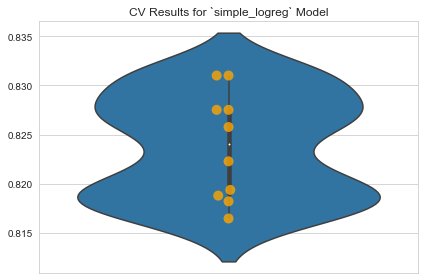

In [89]:
# Saving variable for convenience
model_results = simple_logreg_results

# Plot CV results
fig, ax = plt.subplots()
ax = model_results.plot_cv(ax)
plt.tight_layout();
# Print CV results
model_results.print_cv_summary()

In [90]:
confusion_matrix(y_train, simple_logreg_model.predict(X_train))

array([[6761, 1688],
       [1362, 7409]])

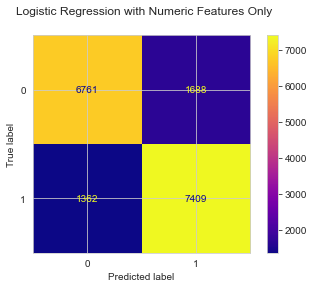

In [91]:
fig, ax = plt.subplots()

fig.suptitle("Logistic Regression with Numeric Features Only")

plot_confusion_matrix(simple_logreg_model, X_train, y_train, ax=ax, cmap="plasma");

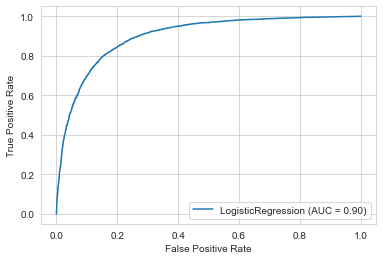

In [92]:
plot_roc_curve(simple_logreg_model, X_train, y_train)

# Decision Tree

In [93]:
ct = DecisionTreeClassifier(max_depth=2, random_state=42)

ct.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [94]:
#Return the mean accuracy on the given test data and labels.
ct.score(X_test, y_test)

0.8029959937293154

In [95]:
# Define the parameter grid
param_dict ={"max_depth":range(1,10),
             "min_samples_split":[10,50,100,500],"min_samples_leaf":[10,50,100,500]}

In [96]:
# Initialize the grid search object with five-fold cross-validation
gs = GridSearchCV(ct, param_grid=param_dict, cv=5,verbose=1,n_jobs=-1)

In [97]:
gs.fit(X_train, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   10.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   16.6s
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:   28.5s finished


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=2, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': range(1, 10),
                         'min_samples_leaf': [10, 50, 100, 500],
                         'min_samples_split': [10, 50, 100, 500]},
             verbose=1)

In [98]:
#best parameters calculated by the GridSearchCV
gs.best_params_

{'max_depth': 7, 'min_samples_leaf': 10, 'min_samples_split': 50}

In [99]:
gs.best_score_

0.8302555168408826

In [100]:
gs.best_estimator_.score(X_test, y_test)

0.823201532834001

In [101]:
gs.cv_results_

{'mean_fit_time': array([0.12753959, 0.17370081, 0.14607692, 0.12263494, 0.10332618,
        0.10489044, 0.08509212, 0.07994204, 0.16392994, 0.24143105,
        0.14912162, 0.16709003, 0.18604732, 0.11197128, 0.12863021,
        0.18193693, 0.20210862, 0.16711316, 0.14136872, 0.11981521,
        0.10485044, 0.10181422, 0.10109296, 0.11078773, 0.11292009,
        0.09905567, 0.11553841, 0.11891937, 0.11255903, 0.12239041,
        0.11763825, 0.12385149, 0.14400001, 0.13755918, 0.12321181,
        0.13434091, 0.13523378, 0.11648383, 0.10746751, 0.11090722,
        0.10438504, 0.11103082, 0.13055964, 0.12204065, 0.10805688,
        0.10608449, 0.1090126 , 0.11306806, 0.15943255, 0.12802105,
        0.159377  , 0.16267471, 0.13403316, 0.13165102, 0.14362092,
        0.15012383, 0.16160622, 0.17490587, 0.14772758, 0.12331161,
        0.13944039, 0.15553141, 0.13340235, 0.12585435, 0.14905105,
        0.14279714, 0.15883026, 0.16100974, 0.15541658, 0.13662767,
        0.14204836, 0.16510515,

In [102]:
pd.DataFrame(gs.cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0         0.127540      0.003917         0.036424        0.002757   
1         0.173701      0.058090         0.040080        0.007565   
2         0.146077      0.043440         0.052556        0.012772   
3         0.122635      0.011119         0.039269        0.004321   
4         0.103326      0.009636         0.032187        0.004210   
..             ...           ...              ...             ...   
139       0.207979      0.017399         0.036802        0.001680   
140       0.170548      0.005200         0.031903        0.003361   
141       0.170621      0.005164         0.032569        0.005310   
142       0.149087      0.013803         0.026105        0.001503   
143       0.131936      0.005126         0.020649        0.004324   

    param_max_depth param_min_samples_leaf param_min_samples_split  \
0                 1                     10                      10   
1                 1                     10                      50   
2                 1                     10                     100   
3                 1                     10                     500   
4                 1                     50                      10   
..              ...                    ...                     ...   
139               9                    100                     500   
140               9                    500                      10   
141               9                    500                      50   
142               9                    500                     100   
143               9                    500                     500   

                                                params  split0_test_score  \
0    {'max_depth': 1, 'min_samples_leaf': 10, 'min_...           0.807491   
1    {'max_depth': 1, 'min_samples_leaf': 10, 'min_...           0.807491   
2    {'max_depth': 1, 'min_samples_leaf': 10, 'min_...           0.807491   
3    {'max_depth': 1, 'min_samples_leaf': 10, 'min_...           0.807491   
4    {'max_depth': 1, 'min_samples_leaf': 50, 'min_...           0.807491   
..                                                 ...                ...   
139  {'max_depth': 9, 'min_samples_leaf': 100, 'min...           0.824042   
140  {'max_depth': 9, 'min_samples_leaf': 500, 'min...           0.822880   
141  {'max_depth': 9, 'min_samples_leaf': 500, 'min...           0.822880   
142  {'max_depth': 9, 'min_samples_leaf': 500, 'min...           0.822880   
143  {'max_depth': 9, 'min_samples_leaf': 500, 'min...           0.822880   

     split1_test_score  split2_test_score  split3_test_score  \
0             0.808653           0.802265           0.807201   
1             0.808653           0.802265           0.807201   
2             0.808653           0.802265           0.807201   
3             0.808653           0.802265           0.807201   
4             0.808653           0.802265           0.807201   
..                 ...                ...                ...   
139           0.820267           0.826074           0.816783   
140           0.821719           0.821138           0.821138   
141           0.821719           0.821138           0.821138   
142           0.821719           0.821138           0.821138   
143           0.821719           0.821138           0.821138   

     split4_test_score  mean_test_score  std_test_score  rank_test_score  
0             0.812427         0.807607        0.003257              113  
1             0.812427         0.807607        0.003257              113  
2             0.812427         0.807607        0.003257              113  
3             0.812427         0.807607        0.003257              113  
4             0.812427         0.807607        0.003257              113  
..                 ...              ...             ...              ...  
139           0.828107         0.823055        0.004068               72  
140           0.831301         0.823635  

In [103]:
#using the best parameters calculated earlier, we create a new Decision Tree model
ct2 = DecisionTreeClassifier(max_depth=7, min_samples_leaf=10, min_samples_split=50, random_state=42)

ct2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, min_samples_leaf=10, min_samples_split=50,
                       random_state=42)

In [104]:
y_pred = ct2.predict(X_test)
y_pred

array(['0', '1', '0', ..., '0', '1', '1'], dtype=object)

In [105]:
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy: {0}".format(acc))

Accuracy: 82.3201532834001


In [106]:
prec = precision_score(y_test, y_pred, pos_label='1') * 100
print("Precision: {0}".format(prec))

Precision: 81.59973666886108


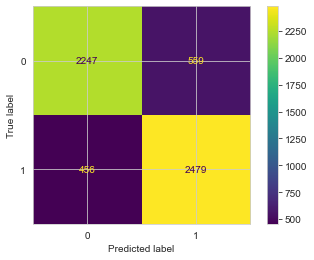

In [107]:
plot_confusion_matrix(ct2, X_test, y_test);

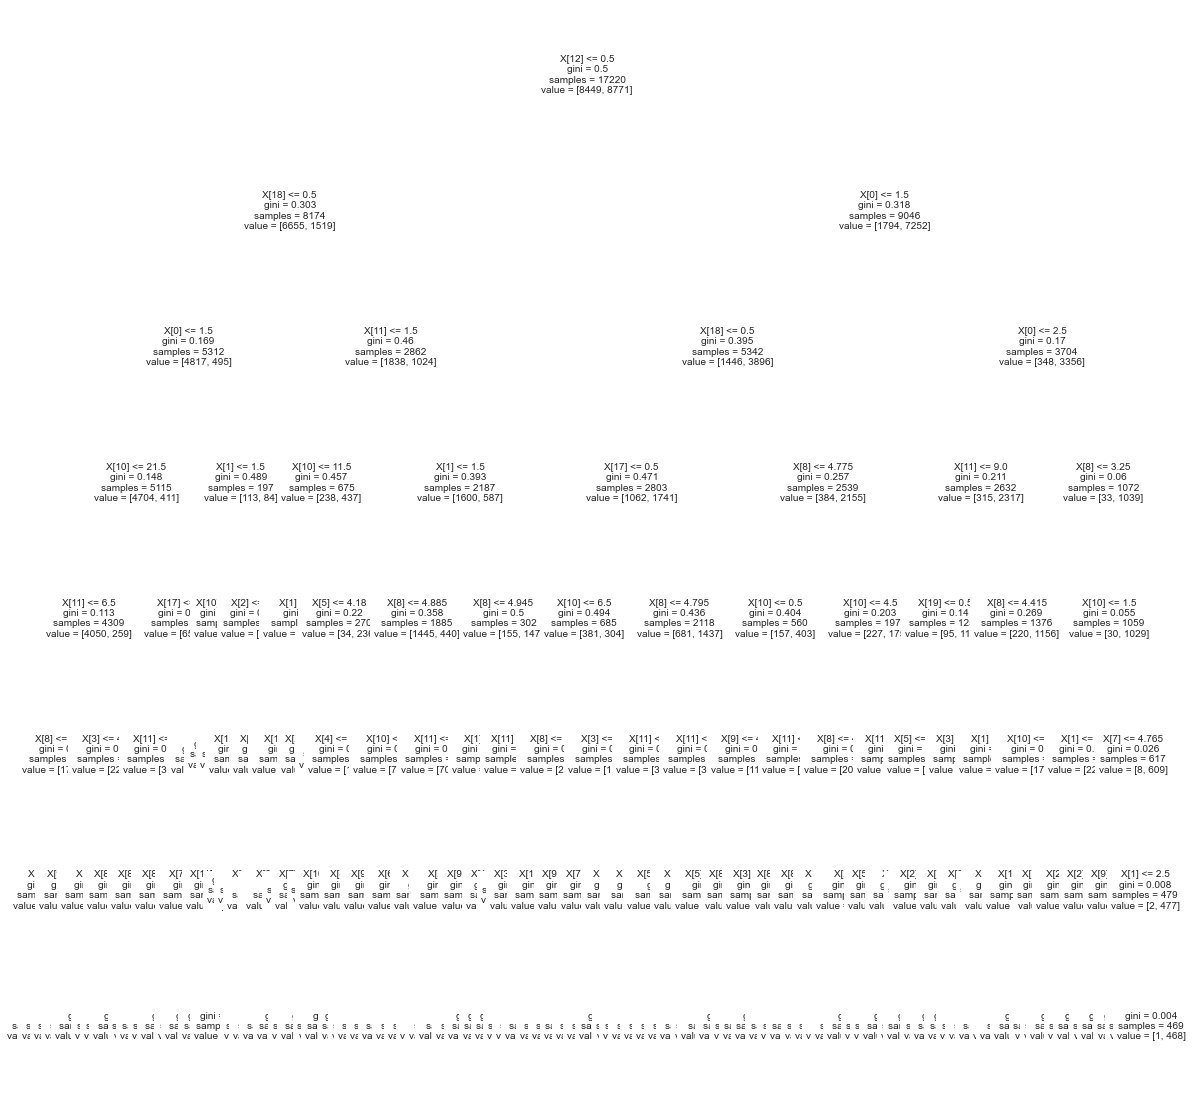

In [108]:
f, ax = plt.subplots(figsize=(20, 20))
tree.plot_tree(ct2, ax=ax, fontsize=10)
plt.show()

# Random Forest

In [109]:
my_rf = RandomForestClassifier()
my_rf.fit(X_train,y_train)

y_predict_rf = my_rf.predict(X_test)
print(y_predict_rf)

accuracy_rf = accuracy_score(y_test, y_predict_rf)

print("The accuracy is " ,"{:.1f}".format(accuracy_rf*100), "%")

['0' '1' '0' ... '1' '1' '1']
The accuracy is  82.3 %


# KNN

In [110]:
k_values = [1,3,5,7,11,15,27,50]

for x in k_values:
    k=x
    my_knn = KNeighborsClassifier(n_neighbors=k)
    my_knn.fit(X_train,y_train)
    y_predict = my_knn.predict(X_test)
    accuracy = accuracy_score(y_test,y_predict)
    print(f"For k = {k}, the accuracy is: ", "{:.1f}".format(accuracy*100), "%")

For k = 1, the accuracy is:  71.9 %
For k = 3, the accuracy is:  74.2 %
For k = 5, the accuracy is:  75.2 %
For k = 7, the accuracy is:  74.7 %
For k = 11, the accuracy is:  73.6 %
For k = 15, the accuracy is:  73.6 %
For k = 27, the accuracy is:  73.3 %
For k = 50, the accuracy is:  71.4 %


# Best Feature

In [127]:
X = X_train
y = y_train
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.title("Top 20 Feature Importance")
plt.show()

[0.03842123 0.03889531 0.06050665 0.04431307 0.04086408 0.04997436
 0.03798999 0.03628732 0.05337603 0.0481534  0.05514439 0.05518333
 0.18914546 0.00420777 0.18279633 0.00684383 0.0034766  0.00792145
 0.03327996 0.01192973 0.00128972]


In [112]:
df.first_review.value_counts()

2020-01-01    119
2021-11-14    118
2021-10-31    112
2019-01-01     99
2020-01-02     97
             ... 
2015-03-04      1
2019-01-25      1
2011-06-17      1
2013-01-24      1
2014-04-05      1
Name: first_review, Length: 3171, dtype: int64